# Prep Stuff

In [1]:
drive_path = 'd:/'

In [2]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import variation

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.stimulus_analysis import StimulusAnalysis
from allensdk.brain_observatory.findlevel import findlevel

manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

In [4]:
#only get the sessions that contain the natural scenes: 79 sessions
expMetaData = pd.DataFrame(boc.get_ophys_experiments())
SessionThreeMD = expMetaData[expMetaData.session_type=='three_session_B']

In [5]:
#SessionThreeMD.sort_values('experiment_container_id')

In [6]:
#lists every cell in all of the sessions: 18260 cells
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

# Get Stuff from one experiment

In [7]:
#Choose an experiment
expContainerID = SessionThreeMD.id[44]
print expContainerID
exp=boc.get_ophys_experiment_data(ophys_experiment_id = expContainerID)

510518066


In [118]:
#all of the cell specimen ids in this experiment
expcells=exp.get_cell_specimen_ids()
CellSpecimenIDList=expcells.tolist()
CellSpecimenIDs=pd.DataFrame(CellSpecimenIDList)
len(CellSpecimenIDs)

238

In [99]:
#Don't really need this
#pick one cell from the list of cells in this experiment
#cell_specimen_id=expcells[1]

In [10]:
# order of all of the stimuli for this experiment
naturalscenelist=exp.get_stimulus_table('natural_scenes')
naturalscenelist.head()

,frame,start,end
0,117,16098,16105
1,80,16106,16113
2,49,16113,16120
3,104,16121,16128
4,73,16128,16135


# Gives COV for all stimuli from one experiment

In [119]:
#NS (natural scene) mean sweep response = mean df/f over 1second calculated by Allen, columns = cell, rows = trial number
NS_alt = pd.read_csv('mean_sweep_response.csv')
del NS_alt['dx']
NS_alt.head()

,0,1,2,3,4,5,6,7,8,9,...,228,229,230,231,232,233,234,235,236,237
0,5.952777,5.919717,2.875329,1.215661,0.057969,-0.522827,6.021945,0.865095,4.891380,2.073973,...,-0.988381,1.466771,-4.634409,9.807891,0.001123,4.687271,3.006371,0.786760,8.280050,3.290543
1,9.691055,7.203629,4.119640,0.345694,4.368604,0.433720,9.276838,5.197964,5.319397,6.318133,...,-0.437358,-0.087996,0.680603,16.565594,-1.959205,6.103164,5.065122,3.245332,7.688806,1.844579
2,6.293092,0.933057,2.531034,2.165378,5.095929,0.588807,4.046335,5.240430,0.690385,4.613018,...,1.812167,-0.855334,2.656682,3.774314,-9.608886,0.966809,2.203763,4.445071,0.896066,-0.450431
3,-0.192006,-1.605794,-0.611917,0.797951,2.502253,-1.723708,-1.104768,5.894948,-2.264323,8.988823,...,-0.643267,-2.093123,-0.607416,-7.115607,4.791955,-4.134358,-0.359975,3.334413,-4.140265,-4.527466
4,-5.332043,-4.534470,-2.905243,-1.342171,-1.900052,19.219366,-2.190243,3.382367,-3.576029,2.667526,...,-3.058865,-2.956945,3.066562,-10.799028,25.598980,-6.445162,-3.561411,1.276237,-6.343560,-2.781956


In [120]:
framelist=pd.DataFrame(naturalscenelist.frame)
full=[framelist,NS_alt]
fullexpDF=pd.concat(full,axis=1)
fullexpDF
np.unique(framelist)
len(framelist)
fullexpDF.head()

,frame,0,1,2,3,4,5,6,7,8,...,228,229,230,231,232,233,234,235,236,237
0,117,5.952777,5.919717,2.875329,1.215661,0.057969,-0.522827,6.021945,0.865095,4.891380,...,-0.988381,1.466771,-4.634409,9.807891,0.001123,4.687271,3.006371,0.786760,8.280050,3.290543
1,80,9.691055,7.203629,4.119640,0.345694,4.368604,0.433720,9.276838,5.197964,5.319397,...,-0.437358,-0.087996,0.680603,16.565594,-1.959205,6.103164,5.065122,3.245332,7.688806,1.844579
2,49,6.293092,0.933057,2.531034,2.165378,5.095929,0.588807,4.046335,5.240430,0.690385,...,1.812167,-0.855334,2.656682,3.774314,-9.608886,0.966809,2.203763,4.445071,0.896066,-0.450431
3,104,-0.192006,-1.605794,-0.611917,0.797951,2.502253,-1.723708,-1.104768,5.894948,-2.264323,...,-0.643267,-2.093123,-0.607416,-7.115607,4.791955,-4.134358,-0.359975,3.334413,-4.140265,-4.527466
4,73,-5.332043,-4.534470,-2.905243,-1.342171,-1.900052,19.219366,-2.190243,3.382367,-3.576029,...,-3.058865,-2.956945,3.066562,-10.799028,25.598980,-6.445162,-3.561411,1.276237,-6.343560,-2.781956


In [121]:
groupedFrame=fullexpDF.groupby('frame')
groupedFrame.last()
type(groupedFrame)

pandas.core.groupby.DataFrameGroupBy

In [122]:
#Gives you all the stats
#groupedFrame.describe()

In [124]:
#get_group pulls all trials/cells for a single stimulus i
for i in np.unique(framelist):
    SortedGF=groupedFrame.get_group(i)
    if i == -1:
        SortedGFData=pd.DataFrame(variation(SortedGF,axis=0))
    if i >=0:
        tmp = pd.DataFrame(variation(SortedGF,axis=0))
#     SortedAll[i]=SortedGFData
        SortedGFData[i] = tmp
    
SortedGFData.tail()
#SortedGFData.shape

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
233,-9.772117,-9.976762,-7.749450,-2.842453,-4.680673,7.194725,6.151444,1.918082,22.154554,-4.212648,...,-1.974166,-3.498963,8.586870,-59.030377,3.814762,-1.991586,-23.913584,-71.949485,14.657214,173.052138
234,-3.708255,3.582632,-4.181001,-3.239126,-27.189414,-4.389402,-7.489363,-184.439713,-25.684026,-25.246452,...,27.930141,-31.955541,2.897416,3.448578,5.891304,-2.947381,6.214780,-33.034607,-3.384229,-7.264435
235,3.877323,43.947368,-5.542012,-2.690168,132.011076,-4.889260,31.500303,-33.923808,-11.680786,7.728095,...,11.456890,10.904368,-3.554049,-35.834152,-28.068552,-15.474442,23.464181,8.081364,5.524333,14.718555
236,-7.765717,18.750407,6.959290,-13.191273,-7.369730,-2.896419,7.311794,-12.187643,19.381642,-14.757628,...,69.268476,-6.349375,9.597372,-90.895035,7.056259,-5.619401,-11.647899,-47.326039,-7.560468,-4.910961
237,48.404711,8.274070,17.058346,-3.522650,-8.034651,5.595022,-6.545836,7.759629,-19.405209,-3.247562,...,4.630964,15.234809,-4.141660,-4.502138,4.476294,-2.779322,19.521523,6.985876,-4.696885,-3.863408


In [126]:
Full=[CellSpecimenIDs,SortedGFData]
FinalDF=pd.concat(Full,axis=1)

In [132]:
SortedGFData.to_csv('510518066_SortedGFData.csv',index=False)
FinalDF.to_csv('510518066_FinalDF.csv',index=False)

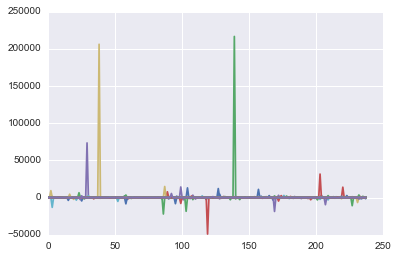

In [130]:
plt.plot(SortedGFData)

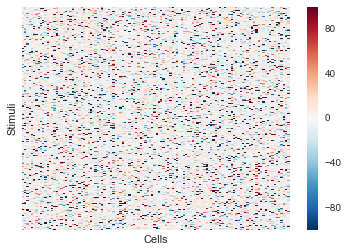

In [131]:
ax=seaborn.heatmap(SortedGFData,vmin=-100,vmax=100,xticklabels=False,yticklabels=False)
plt.xlabel('Cells')
plt.ylabel('Stimuli')

# Gives COV for a single stimulus from a single experiment

In [218]:
#gives all trials for a single stimulus.
#REMEMBER not all stimuli have every trial
image1=naturalscenelist[naturalscenelist.frame==1]
len(image1)

50

In [239]:
#naturalscenelist.keys()

Index([u'frame', u'start', u'end'], dtype='object')

In [264]:
#Pick one scene/stimulus
nsl1=naturalscenelist[naturalscenelist.frame==1]
nslindex=nsl1.index

In [234]:
#NS (natural scene) mean sweep response = mean df/f over 1second calculated by Allen, columns = cell, rows = trial number
NS_alt = pd.read_csv('mean_sweep_response.csv')
NS_alt

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,dx
0,5.952777,5.919717,2.875329,1.215661,0.057969,-0.522827,6.021945,0.865095,4.891380,2.073973,...,1.466771,-4.634409,9.807891,0.001123,4.687271,3.006371,0.786760,8.280050,3.290543,-0.120032
1,9.691055,7.203629,4.119640,0.345694,4.368604,0.433720,9.276838,5.197964,5.319397,6.318133,...,-0.087996,0.680603,16.565594,-1.959205,6.103164,5.065122,3.245332,7.688806,1.844579,-0.076688
2,6.293092,0.933057,2.531034,2.165378,5.095929,0.588807,4.046335,5.240430,0.690385,4.613018,...,-0.855334,2.656682,3.774314,-9.608886,0.966809,2.203763,4.445071,0.896066,-0.450431,-0.009188
3,-0.192006,-1.605794,-0.611917,0.797951,2.502253,-1.723708,-1.104768,5.894948,-2.264323,8.988823,...,-2.093123,-0.607416,-7.115607,4.791955,-4.134358,-0.359975,3.334413,-4.140265,-4.527466,-0.056880
4,-5.332043,-4.534470,-2.905243,-1.342171,-1.900052,19.219366,-2.190243,3.382367,-3.576029,2.667526,...,-2.956945,3.066562,-10.799028,25.598980,-6.445162,-3.561411,1.276237,-6.343560,-2.781956,-0.075218
5,-8.197835,-6.739945,-4.945812,-1.045539,-6.022680,32.465752,-1.059624,42.666271,-0.925655,-5.529069,...,-3.207463,3.107325,-6.138684,7.462718,-5.691776,-5.447705,-6.925447,-6.162549,1.003934,0.094033
6,-6.969195,-5.677513,-4.735251,-4.955486,-6.626766,37.012543,-2.024417,76.445656,7.289837,-4.356719,...,-0.622528,3.368451,-2.777187,-3.802509,-4.784321,-3.798110,-10.868437,-5.978440,1.341910,0.017337
7,-3.022153,-2.148929,-0.983225,-3.317319,8.812530,44.979980,-3.812517,25.045902,2.381548,-6.838468,...,-0.035010,6.822741,-5.519094,-13.120415,-3.926804,-3.493153,-11.064866,-3.828311,3.031193,0.143315
8,-0.537001,0.833654,-1.852359,-2.521207,24.177341,-3.204366,-2.037875,-3.451514,-5.089084,-8.866579,...,-3.725093,-2.144698,-6.346344,-14.032030,-3.785895,-2.900776,-10.117342,-3.346378,-0.889222,0.012518
9,0.192489,0.628130,1.068310,-2.025165,6.833678,-22.672596,-0.256373,-19.346857,2.487681,-7.748689,...,-1.359996,-8.105035,-4.605152,-7.067251,-2.240782,-0.626429,-5.297704,-3.498912,-1.541491,0.021874


In [287]:
#Mean response for all cells for one natural scene stimulus
SingleNS=NS_alt.loc[nslindex]

In [321]:
SingleNSCOV=pd.DataFrame(variation(SingleNS,axis=0))

(array([   3.,  233.,    1.,    0.,    0.,    0.,    0.,    0.,    1.,    1.]),
 array([ -430.96525432,  -118.42116388,   194.12292655,   506.66701699,
          819.21110743,  1131.75519787,  1444.29928831,  1756.84337875,
         2069.38746919,  2381.93155962,  2694.47565006]),
 <a list of 10 Patch objects>)

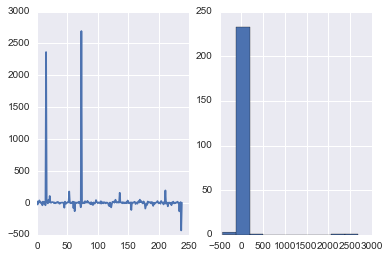

In [324]:
fig,ax=plt.subplots(ncols=2)3

ax[0].plot(SingleNSCOV)
ax[1].hist(SingleNSCOV)

In [219]:
#from allensdk.brain_observatory.natural_scenes import NaturalScenes

In [220]:
#NS=NaturalScenes(exp)
#NS

In [229]:
#help(pickle.dump)

Help on function dump in module pickle:

dump(obj, file, protocol=None)



In [230]:
#THIS DOES NOT WORK
#import pickle

#f = open('NS_cache.pkl','w')
#pickle.dump(NS,f)

#f.close()
#f = open('NS_cache.pkl','r')
#NS=pickle.load(f)

KeyboardInterrupt: 

In [233]:
#NS.mean_sweep_response.to_csv('mean_sweep_response.csv',index=False)

In [227]:
#NS.mean_sweep_response

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,dx
0,5.952777,5.919717,2.875329,1.215661,0.057969,-0.522827,6.021945,0.865095,4.891380,2.073973,...,1.466771,-4.634409,9.807891,0.001123,4.687271,3.006371,0.786760,8.280050,3.290543,-0.120032
1,9.691055,7.203629,4.119640,0.345694,4.368604,0.433720,9.276838,5.197964,5.319397,6.318133,...,-0.087996,0.680603,16.565594,-1.959205,6.103164,5.065122,3.245332,7.688806,1.844579,-0.076688
2,6.293092,0.933057,2.531034,2.165378,5.095929,0.588807,4.046335,5.240430,0.690385,4.613018,...,-0.855334,2.656682,3.774314,-9.608886,0.966809,2.203763,4.445071,0.896066,-0.450431,-0.009188
3,-0.192006,-1.605794,-0.611917,0.797951,2.502253,-1.723708,-1.104768,5.894948,-2.264323,8.988823,...,-2.093123,-0.607416,-7.115607,4.791955,-4.134358,-0.359975,3.334413,-4.140265,-4.527466,-0.056880
4,-5.332043,-4.534470,-2.905243,-1.342171,-1.900052,19.219366,-2.190243,3.382367,-3.576029,2.667526,...,-2.956945,3.066562,-10.799028,25.598980,-6.445162,-3.561411,1.276237,-6.343560,-2.781956,-0.075218
5,-8.197835,-6.739945,-4.945812,-1.045539,-6.022680,32.465752,-1.059624,42.666271,-0.925655,-5.529069,...,-3.207463,3.107325,-6.138684,7.462718,-5.691776,-5.447705,-6.925447,-6.162549,1.003934,0.094033
6,-6.969195,-5.677513,-4.735251,-4.955486,-6.626766,37.012543,-2.024417,76.445656,7.289837,-4.356719,...,-0.622528,3.368451,-2.777187,-3.802509,-4.784321,-3.798110,-10.868437,-5.978440,1.341910,0.017337
7,-3.022153,-2.148929,-0.983225,-3.317319,8.812530,44.979980,-3.812517,25.045902,2.381548,-6.838468,...,-0.035010,6.822741,-5.519094,-13.120415,-3.926804,-3.493153,-11.064866,-3.828311,3.031193,0.143315
8,-0.537001,0.833654,-1.852359,-2.521207,24.177341,-3.204366,-2.037875,-3.451514,-5.089084,-8.866579,...,-3.725093,-2.144698,-6.346344,-14.032030,-3.785895,-2.900776,-10.117342,-3.346378,-0.889222,0.012518
9,0.192489,0.628130,1.068310,-2.025165,6.833678,-22.672596,-0.256373,-19.346857,2.487681,-7.748689,...,-1.359996,-8.105035,-4.605152,-7.067251,-2.240782,-0.626429,-5.297704,-3.498912,-1.541491,0.021874
